In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_excel("./datasets/transactions.xlsx")

df.head()

,transaction_id,customer_id,amount,transaction_date
0,1,24847,194.49,2024-02-27
1,2,16900,173.46,2023-02-03
2,3,39684,50.65,2024-07-25
3,4,24181,26.31,2024-04-04
4,5,3218,73.78,2023-07-20


In [31]:
from datetime import datetime

start_date = pd.to_datetime('2024-01-01')
end_date = datetime.today()

df = df[df["transaction_date"].between(start_date, end_date)]

In [32]:
df["transaction_date"].min()

Timestamp('2024-01-01 00:00:00')

In [33]:
df["transaction_month"] = df["transaction_date"].dt.to_period('M').dt.start_time

df.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month
0,1,24847,194.49,2024-02-27,2024-02-01
2,3,39684,50.65,2024-07-25,2024-07-01
3,4,24181,26.31,2024-04-04,2024-04-01
6,7,3635,26.24,2025-02-25,2025-02-01
10,11,12165,74.01,2024-10-22,2024-10-01


In [34]:
df["acquzition_date"] = df.groupby("customer_id")["transaction_month"].transform("min")

df.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,acquzition_date
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01


In [35]:
df["unique_customer_joined"] = df.groupby(["acquzition_date"])["customer_id"].transform('nunique')


df.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,acquzition_date,unique_customer_joined
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01,8673
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01,3988
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01,7177
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01,1305
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01,12512


In [36]:
df["unique_customers"] = df.groupby('transaction_month')["customer_id"].transform('nunique')

df.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,acquzition_date,unique_customer_joined,unique_customers
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01,8673,11608
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01,3988,12367
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01,7177,12040
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01,1305,11358
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01,12512,12329


In [37]:
df["retention_rate"] = round(df["unique_customer_joined"] / df["unique_customers"]*100, 2)

cohort_df = df[df.columns.tolist()[4:]]

In [38]:
cohort_df.head()

,transaction_month,acquzition_date,unique_customer_joined,unique_customers,retention_rate
0,2024-02-01,2024-02-01,8673,11608,74.72
2,2024-07-01,2024-05-01,3988,12367,32.25
3,2024-04-01,2024-03-01,7177,12040,59.61
6,2025-02-01,2024-09-01,1305,11358,11.49
10,2024-10-01,2024-01-01,12512,12329,101.48


In [39]:
cohort_df["index"] = (df["transaction_date"].dt.year - df["acquzition_date"].dt.year) * 12 + df["transaction_date"].dt.month - df["acquzition_date"].dt.month+1

cohort_df

/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_63015/2940153924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_df["index"] = (df["transaction_date"].dt.year - df["acquzition_date"].dt.year) * 12 + df["transaction_date"].dt.month - df["acquzition_date"].dt.month+1


,transaction_month,acquzition_date,unique_customer_joined,unique_customers,retention_rate,index
0,2024-02-01,2024-02-01,8673,11608,74.72,1
2,2024-07-01,2024-05-01,3988,12367,32.25,3
3,2024-04-01,2024-03-01,7177,12040,59.61,2
6,2025-02-01,2024-09-01,1305,11358,11.49,6
10,2024-10-01,2024-01-01,12512,12329,101.48,10
...,...,...,...,...,...,...
499986,2024-12-01,2024-03-01,7177,12204,58.81,10
499987,2024-02-01,2024-02-01,8673,11608,74.72,1
499988,2025-02-01,2024-01-01,12512,11358,110.16,14
499994,2024-08-01,2024-01-01,12512,12358,101.25,8


In [41]:
cohort_analysis = cohort_df.pivot_table(index="acquzition_date", columns="index", values="retention_rate")

cohort_analysis

index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
acquzition_date,,,,,,,,,,,,,,,
2024-01-01,100.00,107.79,101.28,103.92,102.31,103.17,101.17,101.25,105.06,101.48,104.22,102.52,100.60,110.16,314.21
2024-02-01,74.72,70.20,72.03,70.92,71.51,70.13,70.18,72.83,70.35,72.24,71.07,69.74,76.36,217.81,NaN
2024-03-01,58.09,59.61,58.69,59.18,58.03,58.08,60.27,58.21,59.78,58.81,57.71,63.19,180.24,NaN,NaN
2024-04-01,43.31,42.64,42.99,42.16,42.19,43.78,42.29,43.43,42.72,41.92,45.91,130.94,NaN,NaN,NaN
2024-05-01,32.61,32.88,32.25,32.27,33.49,32.35,33.22,32.68,32.07,35.11,100.15,NaN,NaN,NaN,NaN
2024-06-01,25.30,24.81,24.83,25.76,24.88,25.56,25.14,24.67,27.01,77.05,NaN,NaN,NaN,NaN,NaN
2024-07-01,18.86,18.87,19.58,18.91,19.43,19.11,18.75,20.53,58.56,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-01,14.01,14.54,14.04,14.42,14.18,13.92,15.24,43.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,10.96,10.58,10.87,10.69,10.49,11.49,32.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
def plot_cohort(df:pd.DataFrame, cmap='YlGnBu'):

    fig, ax = plt.subplots(1,1,figsize = (16,10))

    sns.heatmap(df, annot = True, cmap=cmap, fmt='g')

    ax.set_xlabel('Cohort Index')
    ax.set_ylabel("Cohort Month")
    ax.xaxis.set_label_position('top')

    plt.show()

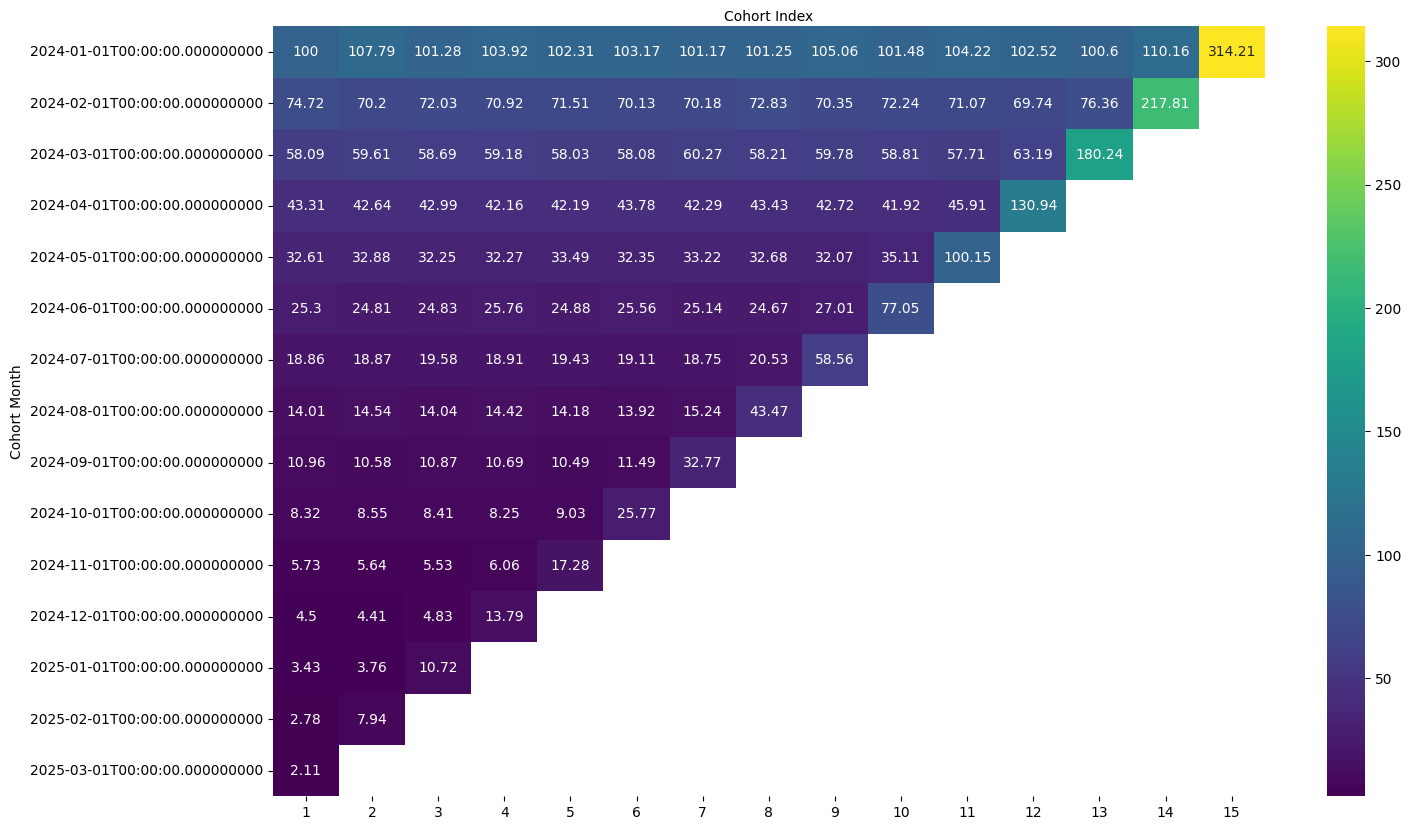

In [88]:
plot_cohort(df=cohort_analysis, cmap='viridis')

# Cumulative Transactions Amount Analysis

In [63]:
df_copy = df[df.columns.tolist()[:4]]

df_copy.head()

,transaction_id,customer_id,amount,transaction_date
0,1,24847,194.49,2024-02-27
2,3,39684,50.65,2024-07-25
3,4,24181,26.31,2024-04-04
6,7,3635,26.24,2025-02-25
10,11,12165,74.01,2024-10-22


In [70]:
start_date = pd.to_datetime('2024-01-01')
end_date = datetime.today()

df_copy = df_copy[df_copy["transaction_date"].between(start_date, end_date)]

In [ ]:
df_copy["transaction_month"] = df_copy["transaction_date"].dt.to_period('M').dt.start_time

df_copy.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month
0,1,24847,194.49,2024-02-27,2024-02-01
2,3,39684,50.65,2024-07-25,2024-07-01
3,4,24181,26.31,2024-04-04,2024-04-01
6,7,3635,26.24,2025-02-25,2025-02-01
10,11,12165,74.01,2024-10-22,2024-10-01


In [72]:
df_copy["transaction_date"].min()

Timestamp('2024-01-01 00:00:00')

In [73]:
df_copy["cohort_month"] = df_copy.groupby("customer_id")["transaction_month"].transform("min")

df_copy.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,cohort_month
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01


In [76]:
df_copy["cohort_index"] = (df_copy["transaction_month"].dt.year - df_copy["cohort_month"].dt.year) * 12 + df_copy["transaction_month"].dt.month - df_copy["cohort_month"].dt.month +1

df_copy.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,cohort_month,index,cohort_index
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01,1,1
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01,3,3
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01,2,2
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01,6,6
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01,10,10


In [93]:
df_copy["cum_sum"] = df_copy.groupby("cohort_index")["amount"].transform("sum")

df_copy["cum_sum"] = round(df_copy["cum_sum"], 0)

df_copy.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,cohort_month,index,cohort_index,cum_sum
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01,1,1,5801610.0
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01,3,3,1391838.0
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01,2,2,1371139.0
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01,6,6,1323795.0
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01,10,10,1097614.0


In [94]:
cumulite_transactions_amount = df_copy.pivot_table(index="cohort_month", columns="cohort_index", values="cum_sum")

In [95]:
cumulite_transactions_amount

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_month,,,,,,,,,,,,,,,
2024-01-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,1097614.0,999093.0,853180.0,668218.0,401373.0,109339.0
2024-02-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,1097614.0,999093.0,853180.0,668218.0,401373.0,NaN
2024-03-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,1097614.0,999093.0,853180.0,668218.0,NaN,NaN
2024-04-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,1097614.0,999093.0,853180.0,NaN,NaN,NaN
2024-05-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,1097614.0,999093.0,NaN,NaN,NaN,NaN
2024-06-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,1097614.0,NaN,NaN,NaN,NaN,NaN
2024-07-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,1160521.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,1256339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,5801610.0,1371139.0,1391838.0,1360988.0,1347514.0,1323795.0,1298242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


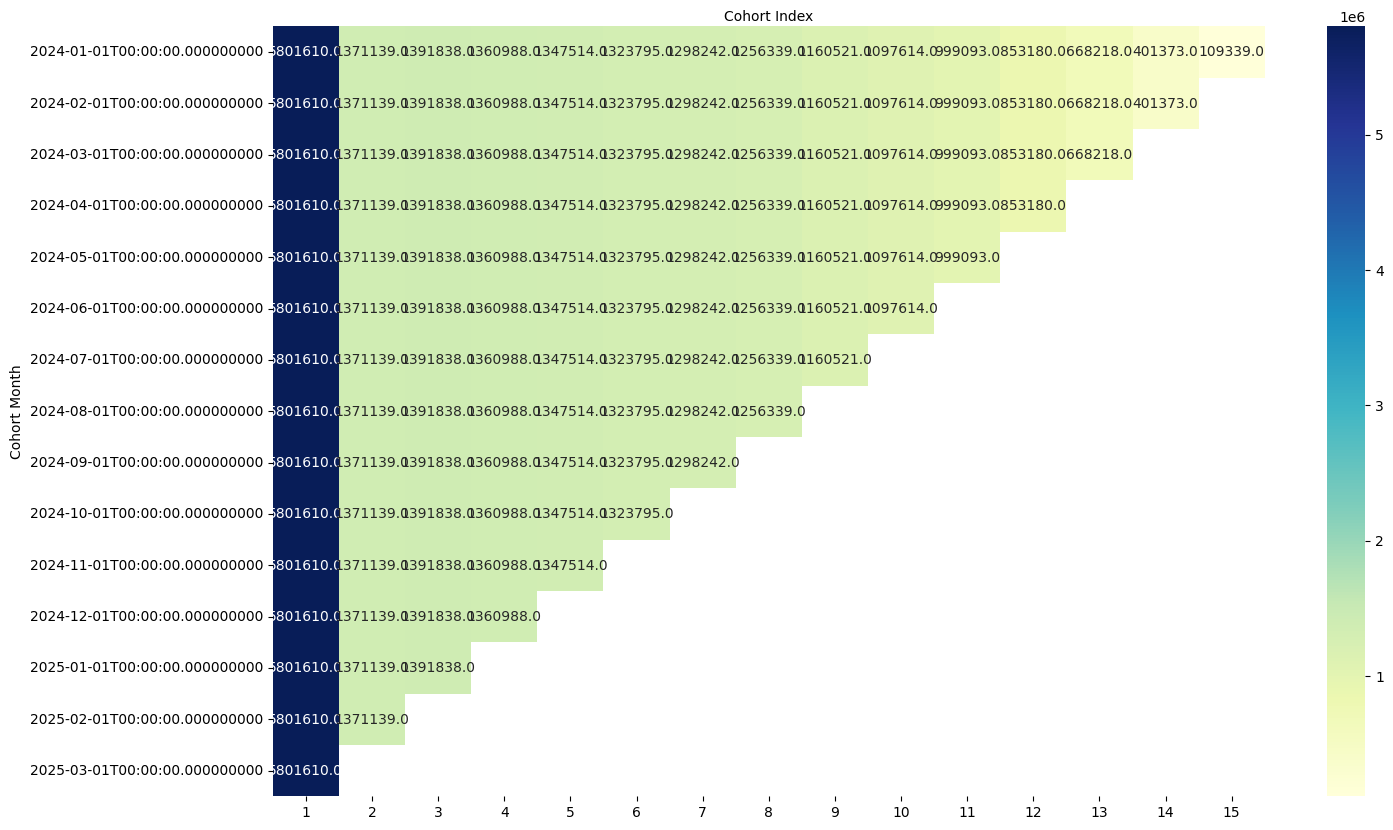

In [96]:
plot_cohort(cumulite_transactions_amount)

### Customer Live Time Value (LTV)

In [100]:
df_copy["unique_customers"] = df_copy.groupby("cohort_month")["customer_id"].transform("nunique")
df_copy["LTV"] =  df_copy["cum_sum"] / df_copy["unique_customers"]

df_copy.head()

,transaction_id,customer_id,amount,transaction_date,transaction_month,cohort_month,index,cohort_index,cum_sum,unique_customers,LTV
0,1,24847,194.49,2024-02-27,2024-02-01,2024-02-01,1,1,5801610.0,8673,668.927707
2,3,39684,50.65,2024-07-25,2024-07-01,2024-05-01,3,3,1391838.0,3988,349.006520
3,4,24181,26.31,2024-04-04,2024-04-01,2024-03-01,2,2,1371139.0,7177,191.046259
6,7,3635,26.24,2025-02-25,2025-02-01,2024-09-01,6,6,1323795.0,1305,1014.402299
10,11,12165,74.01,2024-10-22,2024-10-01,2024-01-01,10,10,1097614.0,12512,87.724904


In [101]:
ltv_analysis = df_copy.pivot_table(index="cohort_month", columns="cohort_index", values="LTV")

ltv_analysis

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cohort_month,,,,,,,,,,,,,,,
2024-01-01,463.683664,109.585918,111.240249,108.774616,107.697730,105.802030,103.759751,100.410726,92.752637,87.724904,79.850783,68.188939,53.406170,32.079044,8.738731
2024-02-01,668.927707,158.092817,160.479419,156.922403,155.368846,152.634037,149.687767,144.856336,133.808486,126.555287,115.195780,98.371959,77.045774,46.278450,NaN
2024-03-01,808.361432,191.046259,193.930333,189.631880,187.754494,184.449631,180.889229,175.050718,161.700014,152.934931,139.207608,118.876968,93.105476,NaN,NaN
2024-04-01,1112.698504,262.972574,266.942463,261.025700,258.441504,253.892405,248.991561,240.954929,222.577867,210.512850,191.617376,163.632528,NaN,NaN,NaN
2024-05-01,1454.766800,343.816199,349.006520,341.270812,337.892177,331.944584,325.537111,315.029840,291.003260,275.229188,250.524824,NaN,NaN,NaN,NaN
2024-06-01,1891.007171,446.916232,453.662973,443.607562,439.215776,431.484681,423.155802,409.497718,378.266297,357.762060,NaN,NaN,NaN,NaN,NaN
2024-07-01,2487.825901,587.966981,596.843053,583.614065,577.836192,567.665094,556.707547,538.738851,497.650515,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-01,3351.594454,792.108030,804.065858,786.243790,778.459850,764.757366,749.995378,725.787984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,4445.678161,1050.681226,1066.542529,1042.902682,1032.577778,1014.402299,994.821456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


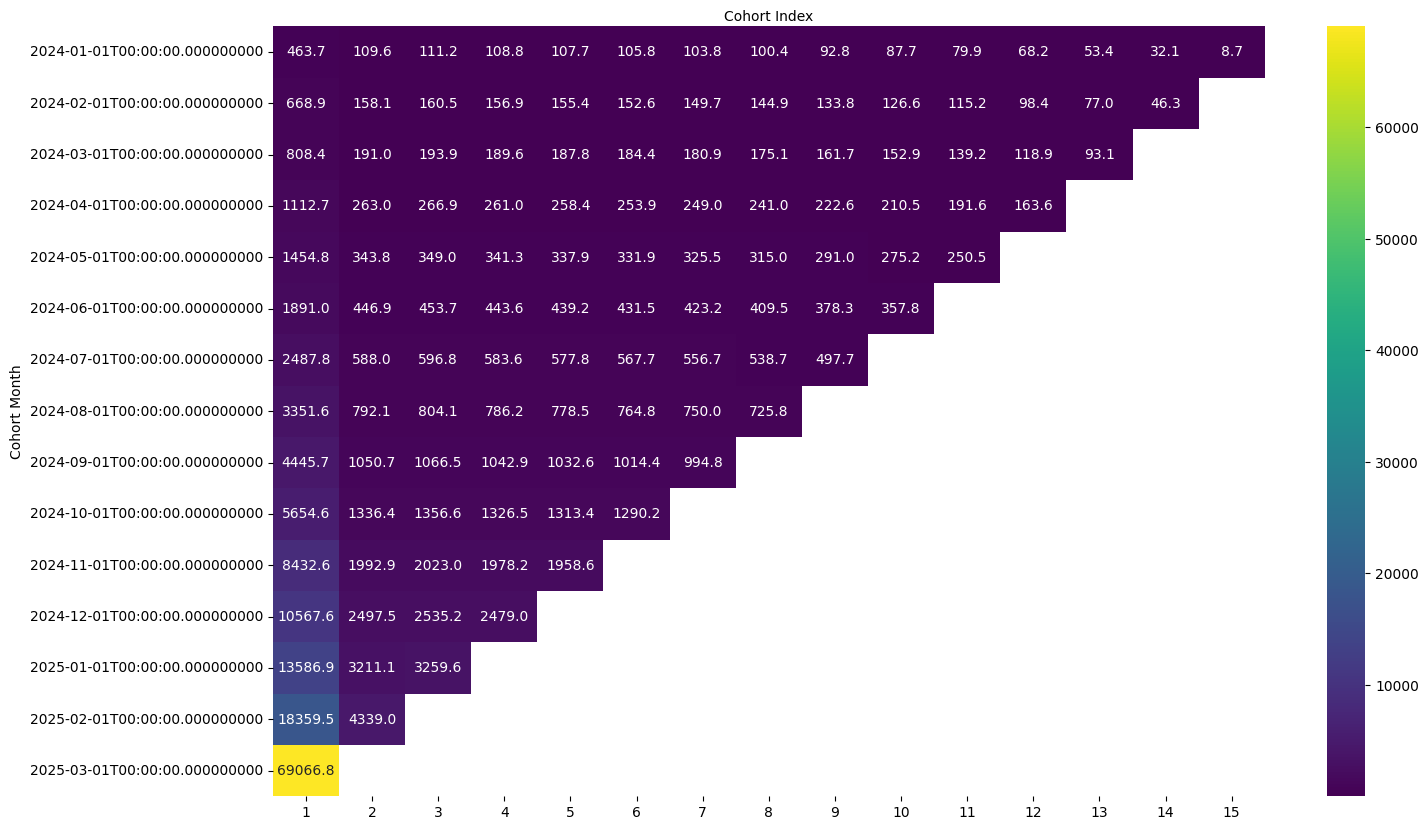

In [103]:
plot_cohort(ltv_analysis, "viridis")